In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
data['Ram'] = data['Ram'].str.replace('GB', '').astype('int')
data['Weight'] = data['Weight'].str.replace('kg', '').astype('float')
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [7]:
data.dtypes

,0
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,int64
Memory,object
Gpu,object
OpSys,object
Weight,float64


<Figure size 800x500 with 0 Axes>

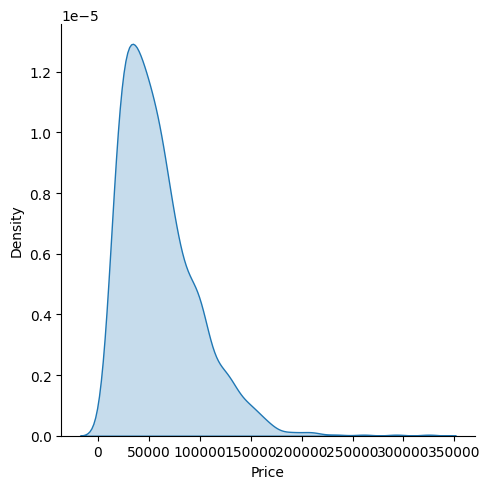

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.displot(data['Price'], kind = 'kde', fill=True)
plt.show()

In [9]:
a = data['Company'].value_counts(sort = False)

In [10]:
a.values

array([ 21, 274, 103, 158, 297, 297,   3,  54,   6,  48,   2,   4,   4,
         7,   7,   9,   3,   3,   3])

<ipython-input-11-4e7fd40f62a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Company'], palette='viridis')


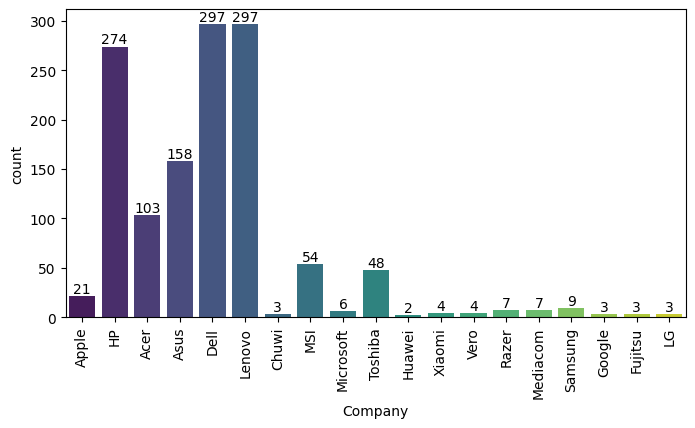

In [11]:
fig = plt.figure(figsize=(8, 4))
sns.countplot(x=data['Company'], palette='viridis')

for index, value in enumerate(a.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

### Company Vs Price

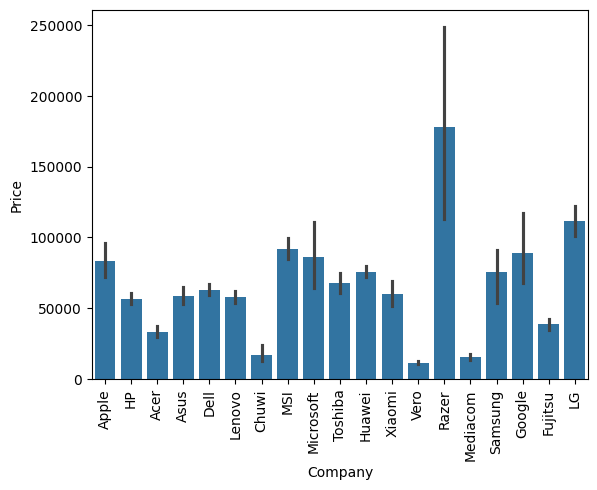

In [12]:
sns.barplot(data=data, x = 'Company', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

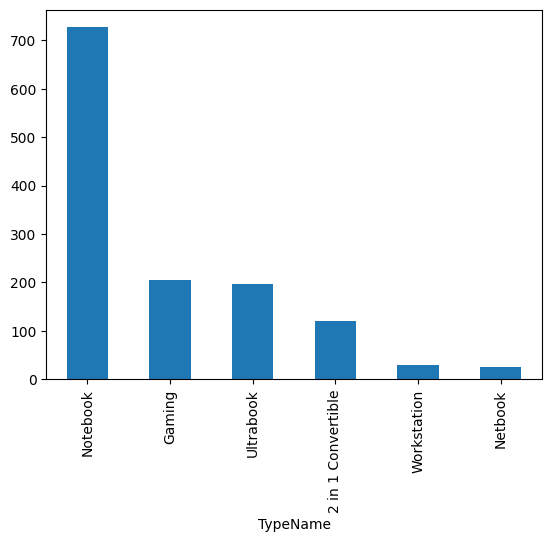

In [13]:
data['TypeName'].value_counts().plot(kind = 'bar')

### TypeName Vs Price

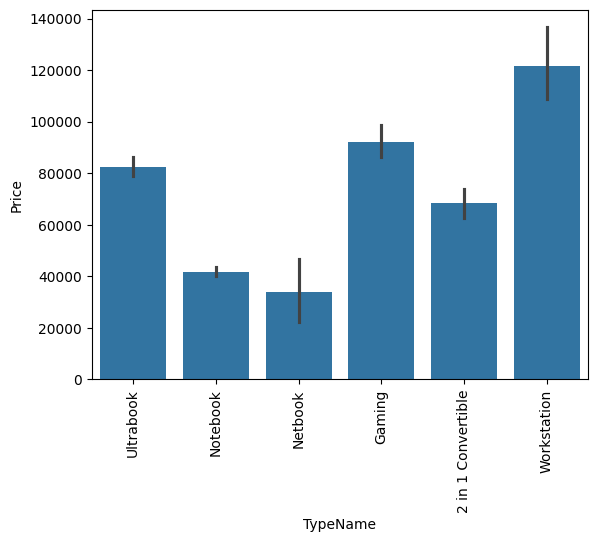

In [14]:
sns.barplot(data=data, x = 'TypeName', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

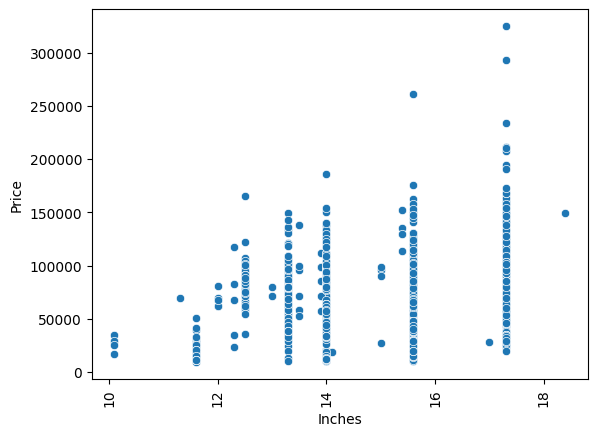

In [15]:
sns.scatterplot(x = data['Inches'], y = data['Price'])
plt.xticks(rotation = 90)
plt.show()

In [16]:
data['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [17]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [18]:
data.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
479,Toshiba,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,89084.160,0,1
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.336,0,1
825,Toshiba,Notebook,14.0,1366x768,Intel Pentium Dual Core 4405U 2.1GHz,4,128GB SSD,Intel HD Graphics 510,Windows 10,1.75,26586.720,0,0


In [19]:
data['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


In [20]:
temp = data['ScreenResolution'].str.split('x', n=1, expand = True)

In [21]:
data['X_res'] = temp[0].str[-4:]
data['Y_res'] = temp[1]

In [22]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [23]:
# data.dtypes
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [24]:
data.corr(numeric_only=True)['Price']
# sns.heatmap(data.corr(numeric_only=True))

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809


In [25]:
data['ppi'] = (((data['X_res']**2 + data['Y_res']**2)**0.5)/data['Inches']).astype('float')
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998


In [26]:
data.drop(columns = ['ScreenResolution'], inplace = True)

In [27]:
data['Cpu_name'] = data['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

In [28]:
data.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,Cpu_name
569,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.02,52747.20,0,0,1366,768,111.935204,Intel Core i5
1072,HP,Ultrabook,12.5,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,63882.72,0,0,1920,1080,176.232574,Intel Core i5
34,Apple,Ultrabook,13.3,Intel Core i5 1.6GHz,8,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,53173.44,0,0,1440,900,127.677940,Intel Core i5


In [29]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [30]:
data['CPU_brand'] = data['Cpu_name'].apply(fetch_processor)
data.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,Cpu_name,CPU_brand
279,Lenovo,Notebook,17.3,Intel Core i7 8550U 1.8GHz,8,2TB HDD,Nvidia GeForce MX150,No OS,2.80,45234.72,0,0,1920,1080,127.335675,Intel Core i7,Intel Core i7
828,Acer,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,18914.40,0,1,1366,768,135.094211,Intel Celeron Dual,Other Intel Processor
218,Dell,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,61218.72,0,0,1920,1080,157.350512,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU_brand'>

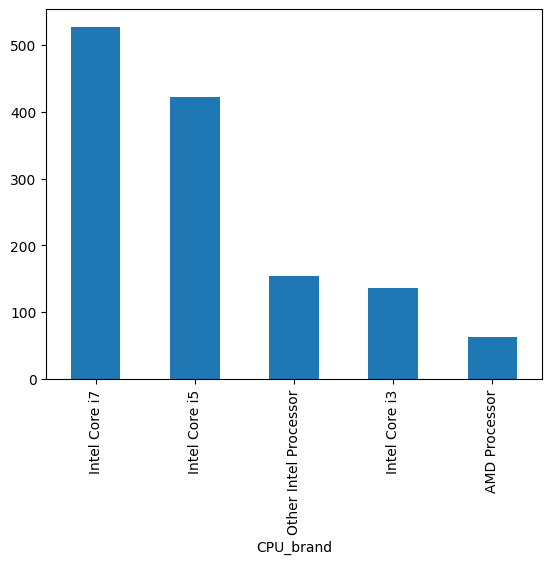

In [31]:
data['CPU_brand'].value_counts().plot(kind = 'bar')

In [32]:
data.drop(columns = ['Cpu', 'Cpu_name'], inplace = True)

<Axes: xlabel='Ram'>

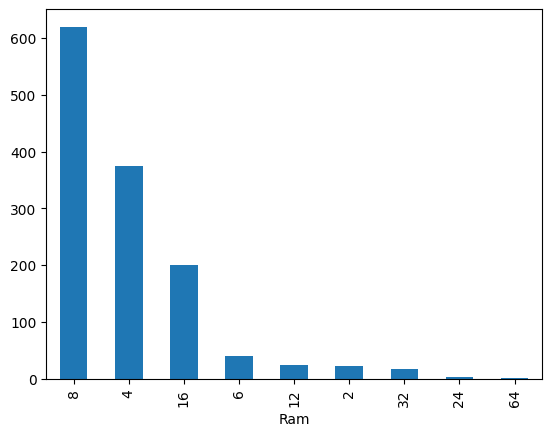

In [33]:
data['Ram'].value_counts().plot(kind = 'bar')

In [34]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,CPU_brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [35]:
data['Memory'].value_counts().sample(5)

,count
Memory,
32GB SSD,6
128GB SSD + 2TB HDD,2
512GB SSD,118
256GB SSD + 256GB SSD,2
512GB Flash Storage,2


In [36]:
# Step 1: Clean the 'Memory' column
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

# Step 2: Split memory into two components
memory_split = data['Memory'].str.split("+", n=1, expand=True)
data['first'] = memory_split[0].str.strip()  # Clean and extract first component
data['second'] = memory_split[1].fillna("0")  # Handle missing values in the second component

# Step 3: Identify storage types in both components
storage_types = ["HDD", "SSD", "Hybrid", "Flash Storage"]

for layer, column in zip(['Layer1', 'Layer2'], ['first', 'second']):
    for storage in storage_types:
        data[f"{layer}{storage.replace(' ', '_')}"] = data[column].apply(lambda x: 1 if storage in x else 0)

# Step 4: Remove non-numeric characters and convert data types
data['first'] = data['first'].str.replace(r'\D', '', regex=True).astype(int)
data['second'] = data['second'].str.replace(r'\D', '', regex=True).astype(int)

# Step 5: Calculate total storage for each type
for storage in storage_types:
    storage_col = storage.replace(' ', '_')  # Column name adjustment
    data[storage_col] = (
        data['first'] * data[f"Layer1{storage_col}"] +
        data['second'] * data[f"Layer2{storage_col}"]
    )

# Step 6: Drop intermediate columns
intermediate_columns = ['first', 'second'] + [f"Layer1{col.replace(' ', '_')}" for col in storage_types] + \
                      [f"Layer2{col.replace(' ', '_')}" for col in storage_types]
data.drop(columns=intermediate_columns, inplace=True)


In [37]:
data.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,CPU_brand,HDD,SSD,Hybrid,Flash_Storage
168,Acer,Notebook,17.3,8,256 SSD,Nvidia GeForce MX150,Windows 10,3.00,45501.12,0,1,1920,1080,127.335675,Intel Core i5,0,256,0,0
23,Dell,2 in 1 Convertible,13.3,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.32,1,0,1920,1080,165.632118,Intel Core i5,0,256,0,0
984,Toshiba,Notebook,14.0,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,48751.20,0,0,1366,768,111.935204,Intel Core i5,500,0,0,0
911,HP,Ultrabook,12.5,8,240 SSD,Intel HD Graphics 515,Windows 10,1.09,165168.00,1,0,3840,2160,352.465147,Other Intel Processor,0,240,0,0
16,Dell,Notebook,15.6,8,256 SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.60,0,0,1920,1080,141.211998,Intel Core i7,0,256,0,0


In [38]:
data.drop(columns = ['Memory'], inplace=True)

In [39]:
data.corr(numeric_only=True)['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809
ppi,0.473487
HDD,-0.096441


In [40]:
data.drop(columns = ['Hybrid', 'Flash_Storage'], inplace = True)

In [41]:
data.head(3)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,CPU_brand,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256


In [42]:
data['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [43]:
data['Gpu_brand'] = data['Gpu'].str.split(' ', n=1).str[0]
# data['Gpu'].apply(lambda x: x.split()[0])

In [44]:
data['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [45]:
data.drop(index = data[data['Gpu_brand'] == 'ARM'].index, inplace = True)

In [46]:
data['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180


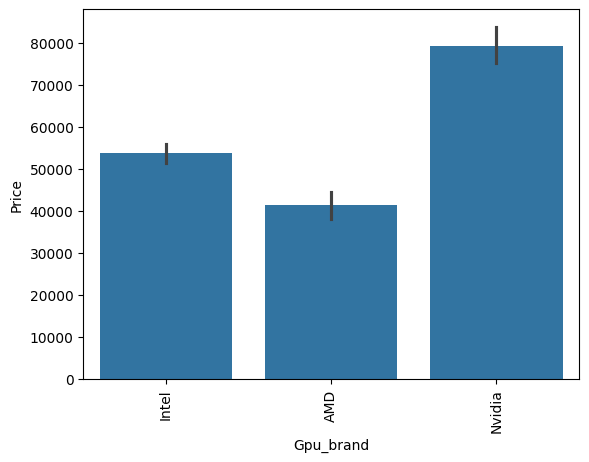

In [47]:
sns.barplot(x = data['Gpu_brand'], y = data['Price'], estimator = 'mean')
plt.xticks(rotation = 90)
plt.show()

In [48]:
data.drop(columns = ['Gpu'], inplace = True)

In [49]:
data.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,CPU_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel


In [50]:
data['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


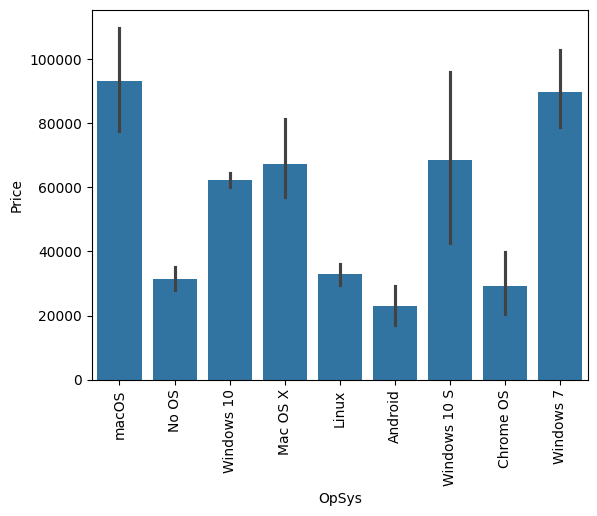

In [51]:
sns.barplot(x = data['OpSys'], y = data['Price'])
plt.xticks(rotation = 90)
plt.show()

In [52]:
def OS_category(text):
    if text in ['Windows 10', 'Windows 10 S', 'Windows 7']:
        return 'Windows'
    elif text in ['macOS', 'mac OS X']:
        return 'macOs'
    else:
        return 'Others/No Os/Linux'

In [53]:
data['os'] = data['OpSys'].apply(OS_category)
data.drop(columns = ['OpSys'], inplace = True)

In [54]:
data.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,CPU_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel,macOs
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel,macOs
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD,macOs
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel,macOs


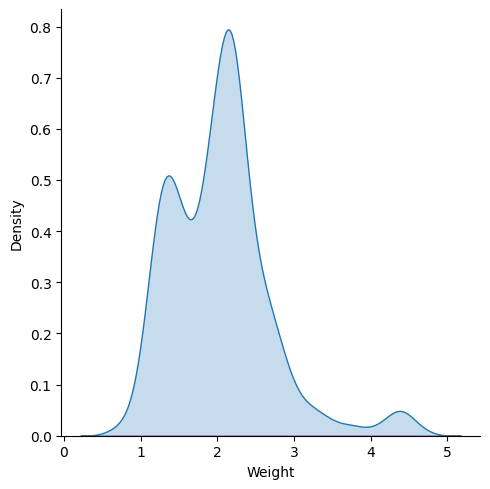

In [55]:
sns.displot(data['Weight'], kind = 'kde', fill = True)

<Axes: xlabel='Weight', ylabel='Price'>

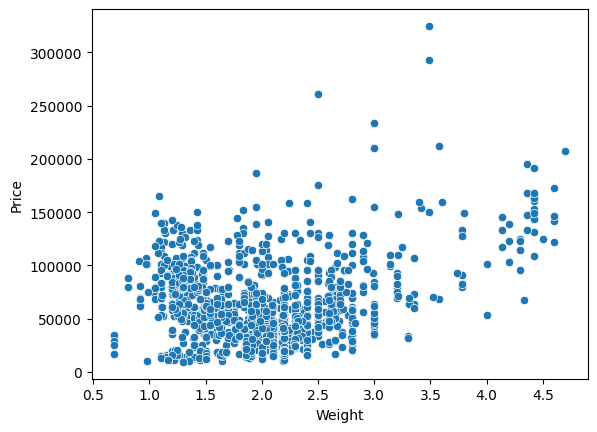

In [56]:
sns.scatterplot(x = data['Weight'], y = data['Price'])

In [57]:
data.corr(numeric_only = True).loc['Weight', 'Price']

np.float64(0.2098669215094933)

<Axes: >

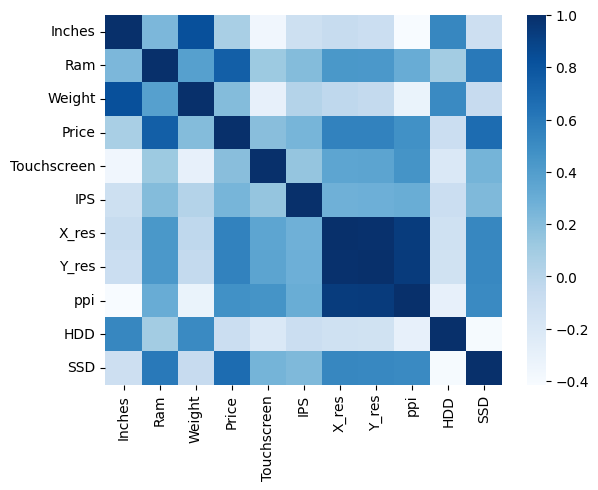

In [58]:
sns.heatmap(data.corr(numeric_only = True), cmap = 'Blues')

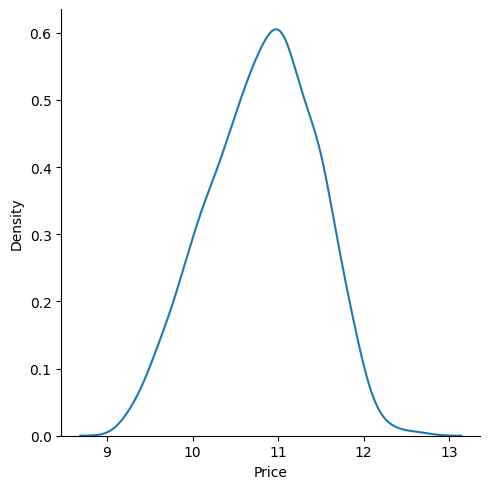

In [59]:
sns.displot(np.log(data['Price']), kind = 'kde')

In [60]:
data.head(1)

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,CPU_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel,macOs


In [61]:
data.rename({'IPS': 'lps'}, axis = 1, inplace = True)

In [62]:
data.drop(columns = ['Inches', 'X_res', 'Y_res'], inplace  =True
)

In [63]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,lps,ppi,CPU_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,macOs
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,macOs
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,macOs
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,macOs


In [64]:
X = data.drop(columns = ['Price'])
y = np.log(data.Price)

### Splitting the data into training and testing data

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor

## Linear Regression

In [68]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0, 1, 7, 10, 11])
    ], remainder = 'passthrough'
)

step2 = LinearRegression()

pipe = Pipeline([('step1', step1),
                ('step2', step2)
                ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('r2_score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_absolute_error(y_test, y_pred))

r2_score:  0.8074747228002337
MSE:  0.2095329858118959


## Ridge Regression

In [74]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0, 1, 7, 10, 11])
    ], remainder = 'passthrough'
)

models = {
    'ridge': Ridge(alpha=10),
    'lasso': Lasso(alpha=0.001),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'svr': SVR(kernel = 'rbf', C = 10000, epsilon=0.1),
    'rnd_forest': RandomForestRegressor(n_estimators = 100, random_state = 3,
                                        max_samples = 0.5, max_features = 0.75,
                                        max_depth = 15)
}
for name, model in models.items():
    # step2 = model

    pipe = Pipeline([('step1', step1),
                ('step2', model)
                ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f'{name}-> r2_score: {r2_score(y_test, y_pred)}, MSE:  {mean_absolute_error(y_test, y_pred)}')

ridge-> r2_score: 0.8128502881264221, MSE:  0.20967287337852628
lasso-> r2_score: 0.8070671084515404, MSE:  0.2113736131750075
knn-> r2_score: 0.7948682647006595, MSE:  0.20019529773838388
dtr-> r2_score: 0.8391070478420816, MSE:  0.18278199667678027
svr-> r2_score: 0.8076188992285434, MSE:  0.20253659656758458
rnd_forest-> r2_score: 0.8875306062265331, MSE:  0.15685456659962702


## Model Selection: RandomForestRegressor

In [75]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0, 1, 7, 10, 11])
    ], remainder = 'passthrough'
)

step2 = RandomForestRegressor(n_estimators = 100, random_state = 3,
                                        max_samples = 0.5, max_features = 0.75,
                                        max_depth = 15)

pipe = Pipeline([('step1', step1),
                ('step2', step2)
                ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('r2_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

r2_score:  0.8875306062265331
MAE:  0.15685456659962702


## Exporting Model

In [76]:
import pickle
pickle.dump(data, open('data.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))